In [15]:
import pandas as pd
import pybaseball

pybaseball.cache.enable()

In [16]:
nyy_2025 = pybaseball.schedule_and_record(2025, "NYY")
print(nyy_2025.head())

               Date   Tm Home_Away  Opp W/L     R   RA  Inn  W-L  Rank  \
1  Thursday, Mar 27  NYY      Home  MIL   W   4.0  2.0  9.0  1-0   1.0   
2  Saturday, Mar 29  NYY      Home  MIL   W  20.0  9.0  9.0  2-0   1.0   
3    Sunday, Mar 30  NYY      Home  MIL   W  12.0  3.0  9.0  3-0   1.0   
4    Tuesday, Apr 1  NYY      Home  ARI   L   5.0  7.0  9.0  3-1   2.0   
5  Wednesday, Apr 2  NYY      Home  ARI   L   3.0  4.0  9.0  3-2   3.0   

       GB     Win     Loss      Save  Time D/N  Attendance   cLI  Streak  \
1    Tied   Rodón  Peralta  Williams  3:08   D     46208.0   .90       1   
2  up 0.5   Gómez   Cortés      None  3:05   D     46683.0   .91       2   
3  up 1.0    Hill   Civale      None  2:41   D     41803.0   .96       3   
4     0.5  Miller   Leiter       Puk  2:53   N     37482.0  1.00      -1   
5     1.0  Gallen    Rodón       Puk  2:34   N     40558.0   .96      -2   

  Orig. Scheduled  
1            None  
2            None  
3            None  
4            None 

In [17]:
nyy_2025["rdiff"] = nyy_2025["R"] - nyy_2025["RA"]
print(nyy_2025.head())

               Date   Tm Home_Away  Opp W/L     R   RA  Inn  W-L  Rank  ...  \
1  Thursday, Mar 27  NYY      Home  MIL   W   4.0  2.0  9.0  1-0   1.0  ...   
2  Saturday, Mar 29  NYY      Home  MIL   W  20.0  9.0  9.0  2-0   1.0  ...   
3    Sunday, Mar 30  NYY      Home  MIL   W  12.0  3.0  9.0  3-0   1.0  ...   
4    Tuesday, Apr 1  NYY      Home  ARI   L   5.0  7.0  9.0  3-1   2.0  ...   
5  Wednesday, Apr 2  NYY      Home  ARI   L   3.0  4.0  9.0  3-2   3.0  ...   

      Win     Loss      Save  Time D/N Attendance   cLI Streak  \
1   Rodón  Peralta  Williams  3:08   D    46208.0   .90      1   
2   Gómez   Cortés      None  3:05   D    46683.0   .91      2   
3    Hill   Civale      None  2:41   D    41803.0   .96      3   
4  Miller   Leiter       Puk  2:53   N    37482.0  1.00     -1   
5  Gallen    Rodón       Puk  2:34   N    40558.0   .96     -2   

   Orig. Scheduled rdiff  
1             None   2.0  
2             None  11.0  
3             None   9.0  
4             None  

In [18]:
nyy_2025["rdiff_abs"] = nyy_2025["rdiff"].abs()
print(nyy_2025.head())


               Date   Tm Home_Away  Opp W/L     R   RA  Inn  W-L  Rank  ...  \
1  Thursday, Mar 27  NYY      Home  MIL   W   4.0  2.0  9.0  1-0   1.0  ...   
2  Saturday, Mar 29  NYY      Home  MIL   W  20.0  9.0  9.0  2-0   1.0  ...   
3    Sunday, Mar 30  NYY      Home  MIL   W  12.0  3.0  9.0  3-0   1.0  ...   
4    Tuesday, Apr 1  NYY      Home  ARI   L   5.0  7.0  9.0  3-1   2.0  ...   
5  Wednesday, Apr 2  NYY      Home  ARI   L   3.0  4.0  9.0  3-2   3.0  ...   

      Loss      Save  Time D/N Attendance   cLI  Streak Orig. Scheduled  \
1  Peralta  Williams  3:08   D    46208.0   .90       1            None   
2   Cortés      None  3:05   D    46683.0   .91       2            None   
3   Civale      None  2:41   D    41803.0   .96       3            None   
4   Leiter       Puk  2:53   N    37482.0  1.00      -1            None   
5    Rodón       Puk  2:34   N    40558.0   .96      -2            None   

   rdiff rdiff_abs  
1    2.0       2.0  
2   11.0      11.0  
3    9.0   

In [19]:
from tqdm import tqdm

teams_2025 = nyy_2025["Opp"].unique().tolist()
teams_2025.append("NYY")
print(teams_2025)

['MIL', 'ARI', 'PIT', 'DET', 'SFG', 'KCR', 'TBR', 'CLE', 'TOR', 'BAL', 'SDP', 'ATH', 'SEA', 'NYM', 'TEX', 'COL', 'LAA', 'LAD', 'BOS', 'CIN', 'CHC', 'ATL', 'PHI', 'MIA', 'HOU', 'MIN', 'STL', 'WSN', 'CHW', 'NYY']


In [20]:
import time

In [21]:
fof_values: dict[str, float] = {}

for team in tqdm(teams_2025, desc="processing team seasons"):
    time.sleep(1)
    team_data = pybaseball.schedule_and_record(2025, team)
    team_data["rdiff"] = team_data["R"] - team_data["RA"]
    team_data["rdiff_abs"] = team_data["rdiff"].abs()
    fof_values[team] = team_data["rdiff_abs"].mean()

print(fof_values)


processing team seasons: 100%|██████████| 30/30 [00:29<00:00,  1.00it/s]

{'MIL': np.float64(3.7777777777777777), 'ARI': np.float64(3.3209876543209877), 'PIT': np.float64(3.3209876543209877), 'DET': np.float64(3.9691358024691357), 'SFG': np.float64(3.1790123456790123), 'KCR': np.float64(3.234567901234568), 'TBR': np.float64(3.3395061728395063), 'CLE': np.float64(3.197530864197531), 'TOR': np.float64(3.8703703703703702), 'BAL': np.float64(4.018518518518518), 'SDP': np.float64(3.2901234567901234), 'ATH': np.float64(4.3580246913580245), 'SEA': np.float64(3.45679012345679), 'NYM': np.float64(3.4753086419753085), 'TEX': np.float64(3.450617283950617), 'COL': np.float64(3.9382716049382718), 'LAA': np.float64(3.506172839506173), 'LAD': np.float64(3.4814814814814814), 'BOS': np.float64(3.567901234567901), 'CIN': np.float64(3.4382716049382718), 'CHC': np.float64(3.8518518518518516), 'ATL': np.float64(3.54320987654321), 'PHI': np.float64(3.580246913580247), 'MIA': np.float64(3.4012345679012346), 'HOU': np.float64(3.6481481481481484), 'MIN': np.float64(3.820987654320987

In [22]:
import matplotlib.pyplot as plt

# sort the fof_values in descending order
fof_values = dict(sorted(fof_values.items(), key=lambda item: item[1], reverse=True))


In [23]:
import matplotlib as mpl

mpl.rcParams["font.family"] = "monospace"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["xtick.labelsize"] = 8
mpl.rcParams["ytick.labelsize"] = 8

In [24]:
import numpy as np

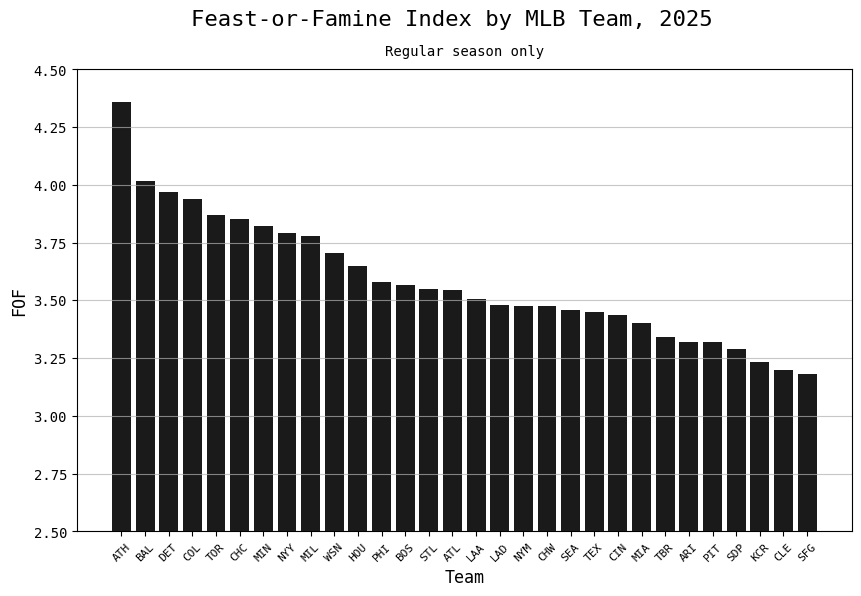

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.grid(True, axis="y", linestyle="-", alpha=0.7)

ax.bar(fof_values.keys(), fof_values.values(), color="0.1", width=0.8)

fig.suptitle("Feast-or-Famine Index by MLB Team, 2025", fontsize=16)

ax.set_xlabel("Team")
ax.set_ylabel("FOF")
ax.set_title("Regular season only", fontsize=10, pad=10)

ax.set_ylim(2.5, 4.5)

plt.xticks(
    rotation=45,
    ha="center",
    fontsize=8
)

plt.yticks(
    np.linspace(2.5, 4.5, 9),
    fontsize=10
)

plt.show()

In [30]:
fig.savefig("../assets/fof_2025.png")

In [32]:
pybaseball.cache.enable()

fof_values: dict[int, float] = {}

for year in tqdm(range(1998, 2026)):
    time.sleep(1)
    nyy_season = pybaseball.schedule_and_record(year, "NYY")
    nyy_season["rdiff"] = nyy_season["R"] - nyy_season["RA"]
    nyy_season["rdiff_abs"] = nyy_season["rdiff"].abs()
    fof_values[year] = nyy_season["rdiff_abs"].mean()

print(fof_values)

100%|██████████| 28/28 [00:26<00:00,  1.05it/s]

{1998: np.float64(4.018518518518518), 1999: np.float64(3.8209876543209877), 2000: np.float64(4.142857142857143), 2001: np.float64(3.658385093167702), 2002: np.float64(3.7142857142857144), 2003: np.float64(3.895705521472393), 2004: np.float64(3.932098765432099), 2005: np.float64(3.8703703703703702), 2006: np.float64(3.8950617283950617), 2007: np.float64(4.277777777777778), 2008: np.float64(3.814814814814815), 2009: np.float64(3.9012345679012346), 2010: np.float64(3.580246913580247), 2011: np.float64(3.54320987654321), 2012: np.float64(3.123456790123457), 2013: np.float64(3.154320987654321), 2014: np.float64(2.993827160493827), 2015: np.float64(3.6790123456790123), 2016: np.float64(3.382716049382716), 2017: np.float64(3.6666666666666665), 2018: np.float64(3.6049382716049383), 2019: np.float64(3.740740740740741), 2020: np.float64(3.9166666666666665), 2021: np.float64(3.246913580246914), 2022: np.float64(3.246913580246914), 2023: np.float64(3.549382716049383), 2024: np.float64(3.8703703703

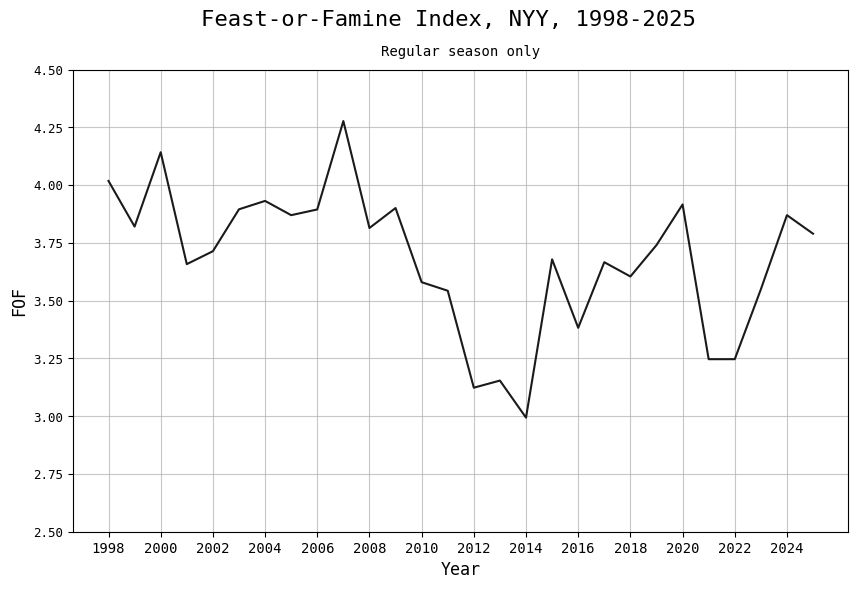

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(fof_values.keys(), fof_values.values(), color="0.1",)

ax.grid(True, axis="both", linestyle="-", alpha=0.7)

fig.suptitle("Feast-or-Famine Index, NYY, 1998-2025", fontsize=16)

ax.set_xlabel("Year")
ax.set_ylabel("FOF")
ax.set_title("Regular season only", fontsize=10, pad=10)

ax.set_ylim(2.5, 4.5)

plt.xticks(
    range(1998, 2026, 2),
    fontsize=10
)

plt.yticks(
    np.linspace(2.5, 4.5, 9),
    fontsize=9
)

plt.show()

In [34]:
fig.savefig("../assets/fof_nyy_1998_2025.png")

In [19]:
all_teams_1998 = pybaseball.team_pitching(1998)

all_team_names_1998 = all_teams_1998["Team"].unique().tolist()
print(all_team_names_1998)


['ATL', 'HOU', 'SDP', 'NYM', 'LAD', 'NYY', 'PIT', 'SFG', 'BOS', 'TOR', 'STL', 'TBD', 'MON', 'CIN', 'CLE', 'ANA', 'CHC', 'MIL', 'ARI', 'PHI', 'BAL', 'MIN', 'OAK', 'DET', 'SEA', 'TEX', 'COL', 'KCR', 'FLA', 'CHW']


In [5]:
from tqdm import tqdm
import pybaseball
import pandas as pd
import time

pybaseball.cache.enable()

fof_means: dict[int, float] = {}

for season in tqdm(range(1998, 2026), desc="processing seasons"):
    print(f"processing season {season}")

    # get all teams this season
    all_teams_this_season = pybaseball.team_pitching(season)["Team"].unique().tolist()

    fof_values: dict[str, float] = {}
    
    for team in tqdm(all_teams_this_season, desc="processing teams"):
        time.sleep(1)
        team_data = pybaseball.schedule_and_record(season, team)
        team_data["rdiff"] = team_data["R"] - team_data["RA"]
        team_data["rdiff_abs"] = team_data["rdiff"].abs()
        fof_values[team] = team_data["rdiff_abs"].mean()

    fof_means[season] = sum(fof_values.values()) / len(fof_values)

    print(f"season {season} done")



processing seasons:   0%|          | 0/28 [00:00<?, ?it/s]

processing season 1998


processing seasons:   4%|▎         | 1/28 [00:28<13:02, 28.99s/it]

season 1998 done
processing season 1999


processing seasons:   7%|▋         | 2/28 [00:58<12:45, 29.45s/it]

season 1999 done
processing season 2000


processing seasons:  11%|█         | 3/28 [01:27<12:10, 29.23s/it]

season 2000 done
processing season 2001


processing seasons:  14%|█▍        | 4/28 [01:56<11:39, 29.14s/it]

season 2001 done
processing season 2002


processing seasons:  18%|█▊        | 5/28 [02:26<11:13, 29.28s/it]

season 2002 done
processing season 2003


processing seasons:  21%|██▏       | 6/28 [02:56<10:52, 29.66s/it]

season 2003 done
processing season 2004


processing seasons:  25%|██▌       | 7/28 [03:27<10:27, 29.90s/it]

season 2004 done
processing season 2005


processing seasons:  29%|██▊       | 8/28 [03:56<09:56, 29.84s/it]

season 2005 done
processing season 2006


processing seasons:  32%|███▏      | 9/28 [05:17<14:28, 45.69s/it]

season 2006 done
processing season 2007


processing teams: 100%|██████████| 30/30 [-1:59:39<00:00, -1.37it/s]


season 2007 done
processing season 2008


processing seasons:  39%|███▉      | 11/28 [05:24<07:19, 25.84s/it]

season 2008 done
processing season 2009


http://www.baseball-reference.com/teams/ATL/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/FLA/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2009-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  43%|████▎     | 12/28 [07:54<15:13, 57.07s/it]

season 2009 done
processing season 2010


http://www.baseball-reference.com/teams/SFG/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/FLA/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2010-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  46%|████▋     | 13/28 [12:07<27:13, 108.89s/it]

season 2010 done
processing season 2011


http://www.baseball-reference.com/teams/PHI/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/FLA/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2011-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  50%|█████     | 14/28 [14:50<28:52, 123.75s/it]

season 2011 done
processing season 2012


http://www.baseball-reference.com/teams/TBR/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2012-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  54%|█████▎    | 15/28 [17:32<29:11, 134.75s/it]

season 2012 done
processing season 2013


http://www.baseball-reference.com/teams/ATL/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2013-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  57%|█████▋    | 16/28 [20:58<30:59, 154.99s/it]

season 2013 done
processing season 2014


http://www.baseball-reference.com/teams/WSN/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2014-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  61%|██████    | 17/28 [23:43<28:59, 158.10s/it]

season 2014 done
processing season 2015


http://www.baseball-reference.com/teams/STL/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2015-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  64%|██████▍   | 18/28 [27:11<28:45, 172.50s/it]

season 2015 done
processing season 2016


http://www.baseball-reference.com/teams/CHC/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2016-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  68%|██████▊   | 19/28 [30:39<27:27, 183.04s/it]

season 2016 done
processing season 2017


http://www.baseball-reference.com/teams/CLE/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2017-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  71%|███████▏  | 20/28 [34:09<25:28, 191.11s/it]

season 2017 done
processing season 2018


http://www.baseball-reference.com/teams/HOU/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2018-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  75%|███████▌  | 21/28 [36:53<21:21, 183.01s/it]

season 2018 done
processing season 2019


http://www.baseball-reference.com/teams/LAD/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2019-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  79%|███████▊  | 22/28 [39:34<17:38, 176.41s/it]

season 2019 done
processing season 2020


http://www.baseball-reference.com/teams/LAD/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/CLE/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/TBR/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/MIN/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/OAK/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/CHW/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/SDP/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/CIN/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/STL/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/CHC/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/MIL/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/KCR/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/HOU/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/ATL/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/BAL/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/TOR/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/SFG/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/PIT/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/ARI/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/MIA/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/NYM/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/TEX/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/SEA/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/LAA/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/WSN/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/PHI/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/BOS/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/COL/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

http://www.baseball-reference.com/teams/DET/2020-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

season 2020 done
processing season 2021


http://www.baseball-reference.com/teams/LAD/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2021-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  86%|████████▌ | 24/28 [44:56<11:15, 168.85s/it]

season 2021 done
processing season 2022


http://www.baseball-reference.com/teams/LAD/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2022-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  89%|████████▉ | 25/28 [47:42<08:24, 168.09s/it]

season 2022 done
processing season 2023


http://www.baseball-reference.com/teams/MIL/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ATL/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2023-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  93%|█████████▎| 26/28 [50:25<05:33, 166.57s/it]

season 2023 done
processing season 2024


http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SEA/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CLE/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/DET/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/HOU/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/KCR/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TBR/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHC/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PHI/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SDP/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAD/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/NYM/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/BOS/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/STL/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CIN/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/SFG/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/PIT/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIN/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TOR/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/WSN/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/OAK/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/TEX/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/LAA/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/ARI/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/CHW/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/MIA/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


http://www.baseball-reference.com/teams/COL/2024-schedule-scores.shtml


/home/wyoming/Programming/feast-or-famine/.venv/lib/python3.12/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
processing seasons:  96%|█████████▋| 27/28 [53:11<02:46, 166.44s/it]

season 2024 done
processing season 2025


processing seasons: 100%|██████████| 28/28 [53:42<00:00, 115.10s/it]

season 2025 done


In [35]:
print(fof_means)

{1998: np.float64(3.4587491016612852), 1999: np.float64(3.642841634116344), 2000: np.float64(3.642419479605692), 2001: np.float64(3.5697824808935916), 2002: np.float64(3.507664289548347), 2003: np.float64(3.55707090379892), 2004: np.float64(3.5534787720778054), 2005: np.float64(3.4030636976444746), 2006: np.float64(3.5574201876134244), 2007: np.float64(3.5869966421772825), 2008: np.float64(3.504375997424515), 2009: np.float64(3.5197646983738076), 2010: np.float64(3.4139917695473248), 2011: np.float64(3.290975896531452), 2012: np.float64(3.3032921810699585), 2013: np.float64(3.285467949203464), 2014: np.float64(3.264609053497942), 2015: np.float64(3.3780551082483443), 2016: np.float64(3.4406602254428345), 2017: np.float64(3.671604938271605), 2018: np.float64(3.5384753120134405), 2019: np.float64(3.6603749712445364), 2020: np.float64(3.67088122605364), 2021: np.float64(3.532271298213326), 2022: np.float64(3.4662551440329223), 2023: np.float64(3.554732510288066), 2024: np.float64(3.525228

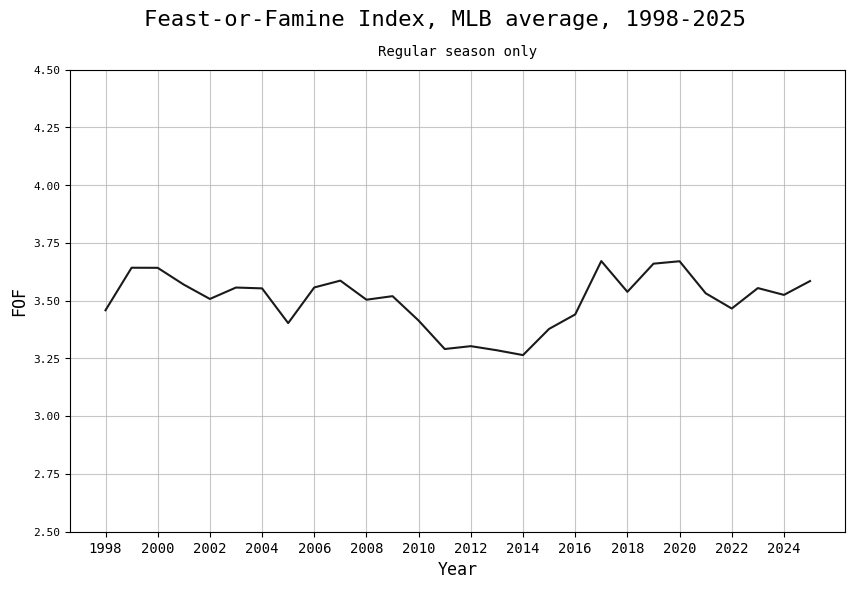

In [36]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(fof_means.keys(), fof_means.values(), color="0.1",)

ax.grid(True, axis="both", linestyle="-", alpha=0.7)

fig.suptitle("Feast-or-Famine Index, MLB average, 1998-2025", fontsize=16)

ax.set_xlabel("Year")
ax.set_ylabel("FOF")
ax.set_title("Regular season only", fontsize=10, pad=10)

plt.xticks(
    range(1998, 2026, 2),
    fontsize=10
)

plt.yticks(
    np.linspace(2.5, 4.5, 9),
)

plt.show()

In [37]:
fig.savefig("../assets/fof_mlb_1998_2025.png")